In [23]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

%matplotlib inline

In [24]:
fs_labels = 26
fs_ticks = 25
fs_text = 23
fs_legend = 22

In [25]:
masses = [100000]

In [26]:
dp_frac = []

good_graphs = []
bad_graphs = []

for mass in masses:
    with open ("/Users/smsharma/Desktop//MG5_aMC_v2_5_6_patch_int_signal/bin/sig_tchannel_lambda0p3//Events/html_lambda0p3_"+str(mass) + "_0.html", "r") as myfile:
        data=myfile.read()
        
    soup = BeautifulSoup(data) # Parse the HTML as a string
    
    for table in soup.find_all('table')[1:]:
    
        dp_sum = 0.
        rest_sum = 0.

        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')

            for icolumn, column in enumerate(columns):
                graph_cxn = None
                if icolumn == 0:
                    graph_name = (column.get_text())
                if icolumn == 1:
                    graph_cxn = (column.get_text())
                if graph_cxn is not None:
#                     print graph_name, graph_cxn
                    if float(graph_cxn) > 1e-17: 
                        
                        good_graphs.append(graph_name)
                    else:
                        bad_graphs.append(graph_name)

In [27]:
masses = [100] + list(np.arange(300,2000, 100))+  list(np.arange(2000,7000, 500))

In [ ]:
dp_frac = []
dp_sum_ary = []

for mass in tqdm(masses):
    with open ("/Users/smsharma/Desktop//MG5_aMC_v2_5_6_patch_int_signal/bin/sig_tchannel_lambda0p3//Events/html_lambda0p3_"+str(mass) + "_0.lhe", "r") as myfile:
        data=myfile.read()
        
    soup = BeautifulSoup(data) # Parse the HTML as a string
    dp_sum = 0.
    rest_sum = 0.
    
    for table in soup.find_all('table')[1:]:
    


        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')

            for icolumn, column in enumerate(columns):
                graph_cxn = None
                if icolumn == 0:
                    graph_name = (column.get_text())
                if icolumn == 1:
                    graph_cxn = (column.get_text())
                if graph_cxn is not None:
#                     print graph_name, graph_cxn
                    if graph_name in good_graphs:
                        dp_sum += float(graph_cxn)
                    else:
                        rest_sum += float(graph_cxn)
#                     print float(graph_cxn)
#     print mass, dp_sum/(dp_sum+rest_sum)
#     print dp_sum,rest_sum

    dp_sum_ary.append(dp_sum)
    dp_frac.append(dp_sum/(dp_sum+rest_sum))

In [4]:
masses = [100000]

In [5]:

good_graphs = []
bad_graphs = []

for mass in masses:
    with open ("/Users/smsharma/Desktop//MG5_aMC_v2_5_6_patch_int_signal/bin/sig_tchannel_lambda1//Events/html_lambda0p3_"+str(mass) + "_0.html", "r") as myfile:
        data=myfile.read()
        
    soup = BeautifulSoup(data) # Parse the HTML as a string
    
    for table in soup.find_all('table')[1:]:
    
        dp_sum = 0.
        rest_sum = 0.

        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')

            for icolumn, column in enumerate(columns):
                graph_cxn = None
                if icolumn == 0:
                    graph_name = (column.get_text())
                if icolumn == 1:
                    graph_cxn = (column.get_text())
                if graph_cxn is not None:
#                     print graph_name, graph_cxn
                    if float(graph_cxn) > 1e-16: 
                        
                        good_graphs.append(graph_name)
                    else:
                        bad_graphs.append(graph_name)

In [6]:
masses = [100] + list(np.arange(300,2000, 100))+  list(np.arange(2000,7000, 500))

In [19]:
dp_frac_lambda1 = []
dp_sum_ary_lambda1 = []

for mass in tqdm(masses):
    with open ("/Users/smsharma/Desktop//MG5_aMC_v2_5_6_patch_int_signal/bin/sig_tchannel_lambda1//Events/html_lambda0p3_"+str(mass) + "_0.html", "r") as myfile:
        data=myfile.read()
        
    soup = BeautifulSoup(data) # Parse the HTML as a string
    dp_sum_lambda1 = 0.
    rest_sum_lambda1 = 0.
    
    for table in soup.find_all('table')[1:]:
    


        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')

            for icolumn, column in enumerate(columns):
                graph_cxn = None
                if icolumn == 0:
                    graph_name = (column.get_text())
                if icolumn == 1:
                    graph_cxn = (column.get_text())
                if graph_cxn is not None:
#                     print graph_name, graph_cxn
                    if graph_name in good_graphs:
                        dp_sum_lambda1 += float(graph_cxn)
                    else:
                        rest_sum_lambda1 += float(graph_cxn)
#                     print float(graph_cxn)
#     print mass, dp_sum_lambda1/(dp_sum_lambda1+rest_sum_lambda1)
#     print dp_sum,rest_sum

    dp_sum_ary_lambda1.append(dp_sum_lambda1)
    dp_frac_lambda1.append(dp_sum_lambda1/(dp_sum_lambda1+rest_sum_lambda1))

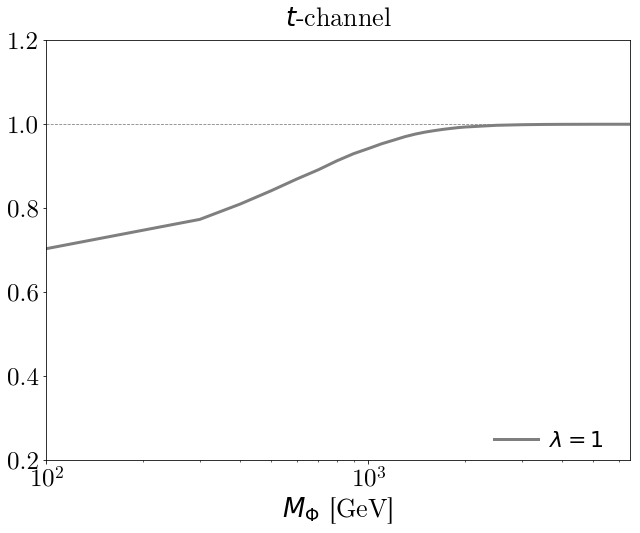

In [13]:
fig=plt.figure(figsize=(9,7.5))
plot_colorsss=['cornflowerblue','mediumseagreen', 'firebrick','indigo','violet','maroon','darkgrey','lightpink','black','forestgreen','cornflowerblue', 'salmon','violet','goldenrod','maroon','darkgrey','lightpink']

lw = 2.5


plt.plot(masses, np.array(dp_frac)*1, color = 'k', label = "$\lambda = 0.3$",lw=3, alpha=0.5, ls='--')
plt.plot(masses, np.array(dp_frac_lambda1)*1, color = 'k', label = r"$\lambda = 1$",lw=3, alpha=0.5)


plt.xscale("log")
plt.xlabel(r"$M_\Phi$ [GeV]",fontsize=fs_labels)
# plt.ylabel(r"$\sigma_{pp\\rightarrow \chi\overline\chi}/\sigma_\mathrm{tot}$",fontsize=fs_labels)
plt.ylim(0.2,1.2)
plt.xlim(min(masses), max(masses))

leg = plt.legend(bbox_to_anchor=(0, 0, 0.97, 0.95),
           fontsize=fs_legend, ncol=1,frameon=False,
           handletextpad=.5,
           borderaxespad=0., loc='lower right')
plt.tick_params(axis='both', which='major', labelsize=fs_ticks)

title = r"$t$-channel"
plt.title(title, fontsize=fs_labels)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])
plt.tight_layout()

plt.tick_params(axis='both', which='major', labelsize=fs_ticks)

plt.axhline(1.,ls='--',lw=0.8, color='grey')

# plt.savefig("tchannel_direct_vs_cxn.pdf")